In [1]:
import numpy as np 
import cv2 as cv
import math 
import matplotlib.pyplot as plt

In [2]:
def load_image(path):
    #load grayscaled image
    return cv.imread(path,0)
    

In [3]:
img = load_image('praha.jpg')
# convert image as numpy 
img = np.array(img)

In [4]:
#The first step of the canny edge detector is smoothing the image with a gaussian filter
blurred = cv.GaussianBlur(img,(5,5),0)

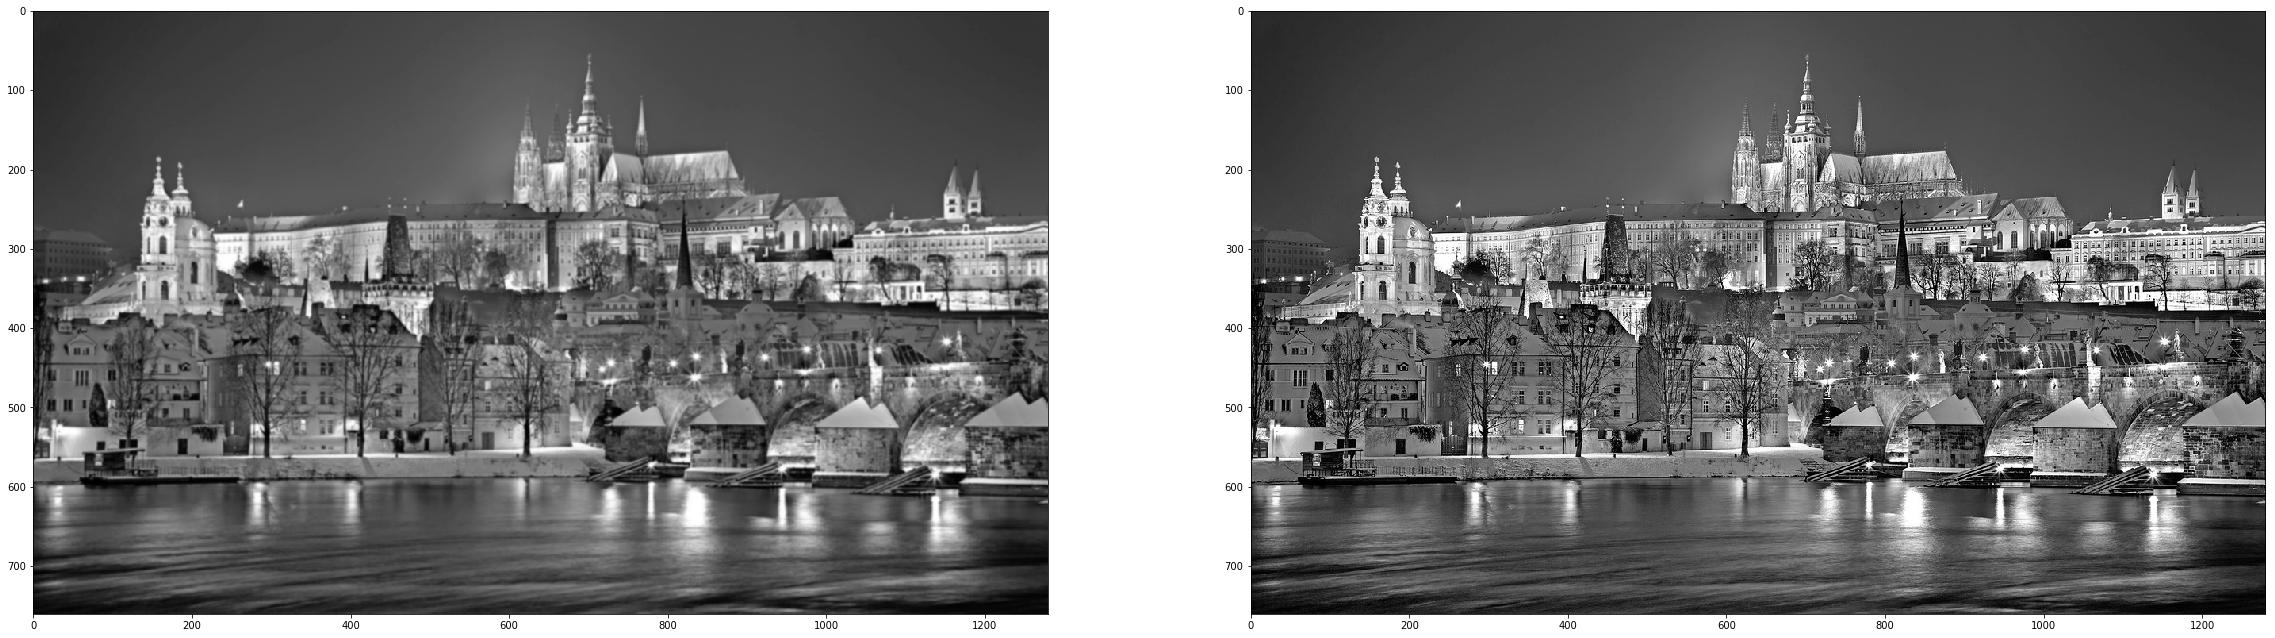

In [5]:
plt.figure(figsize=(40,40))
plt.subplot(1,2,1)
plt.imshow(blurred,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img,cmap='gray')


In [6]:
dx = cv.Sobel(blurred,-1,1,0)
dy = cv.Sobel(blurred,-1,0,1)

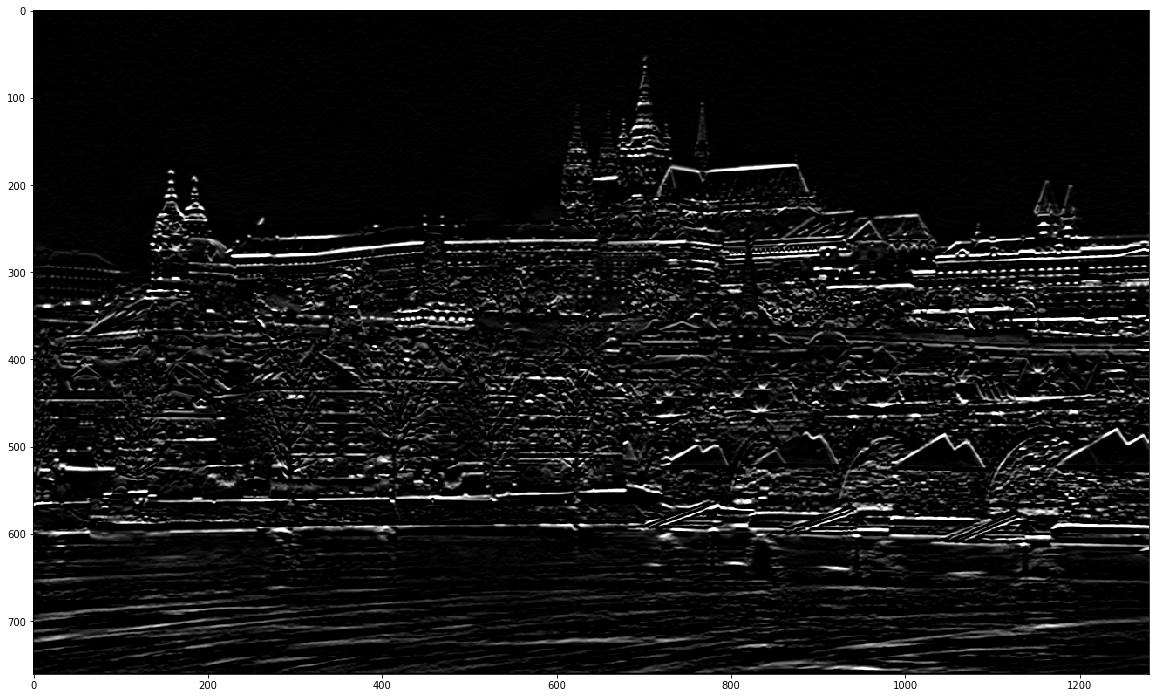

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(dx,cmap='gray')
plt.imshow(dy,cmap='gray')


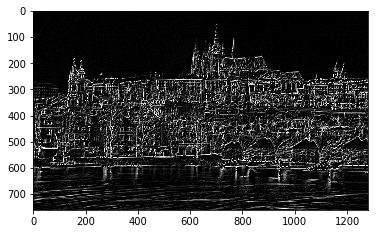

In [8]:
dx = np.array(dx)
dy = np.array(dy)
shape = dx.shape
orientations = np.zeros(shape)
d_img = dx + dy
plt.imshow(d_img, cmap='gray')


In [9]:
for x in range(shape[0]):
    for y in range(shape[1]):
        if dx[x][y]:
            #calculate orientation in degree 
            orientations[x][y] = (np.arctan(dy[x,y]/dx[x,y])*180) / np.pi

            

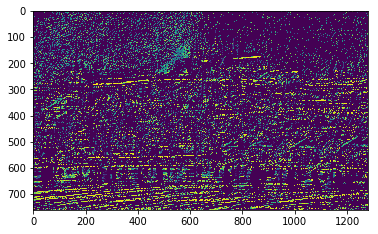

In [10]:
plt.imshow(orientations)

In [11]:
#sample orientations
angle_array= np.array([0,45,90,135])

sampled_orientations = np.zeros(shape)
for x in range(shape[0]):
    for y in range(shape[1]):
        if orientations[x][y] % 180 <= 45 / 2:
            sampled_orientations[x][y] = 0

        if orientations[x][y] % 180 > 45 / 2 and orientations[x][y] % 180 <= 45 + 45/2:
            sampled_orientations[x][y] = 45
            
        if orientations[x][y] % 180 > 45 + 45/2 and orientations[x][y] % 180 <= 90 + 45/2:
            sampled_orientations[x][y] = 90
            
        if orientations[x][y] % 180 >  90 + 45/2 and orientations[x][y] % 180 <= 135 + 45/2:
            sampled_orientations[x][y] = 90
            
        

[  0  45  90 135]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


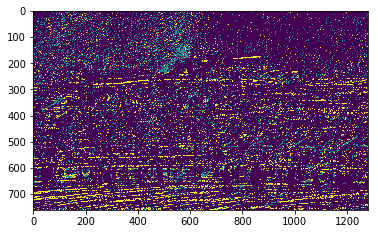

In [12]:
plt.imshow(sampled_orientations)
print(angle_array)
print(sampled_orientations)

In [13]:
magnitude = np.sqrt(dx**2 + dy**2)

In [14]:
# non maxima suppression without border 
holded = 0
deleted = 0
for x in range (1,shape[0]-1):
    for y in range(1,shape[1]-1):
        hold=False
        current_magnitude = magnitude[x,y]
        current_orientation = sampled_orientations[x,y]

        neighborhood_magnitude_orientation = np.array([[magnitude[x-1][y-1],sampled_orientations[x-1][y-1]],
                                                        [magnitude[x][y-1],sampled_orientations[x][y-1]],
                                                        [magnitude[x+1][y-1],sampled_orientations[x+1][y-1]],
                                                        [magnitude[x-1][y],sampled_orientations[x-1][y]],
                                                        [magnitude[x+1][y],sampled_orientations[x+1][y]],
                                                        [magnitude[x-1][y+1],sampled_orientations[x-1][y+1]]
,                                                       [magnitude[x][y+1],sampled_orientations[x][y+1]],
                                                        [magnitude[x+1][y+1],sampled_orientations[x+1][y+1]]])

        if current_magnitude == np.max(neighborhood_magnitude_orientation[:,0]):
                                 continue
        for n in neighborhood_magnitude_orientation:
            if n[0] > current_magnitude and n[1] == current_orientation:
                hold = True
                holded += 1
            
        if not hold:
            d_img[x][y] = 0
            deleted += 1
        
print("holded",holded)
print("deleted",deleted)
            
        
        

holded 2002924
deleted 134880


15.81
0.0


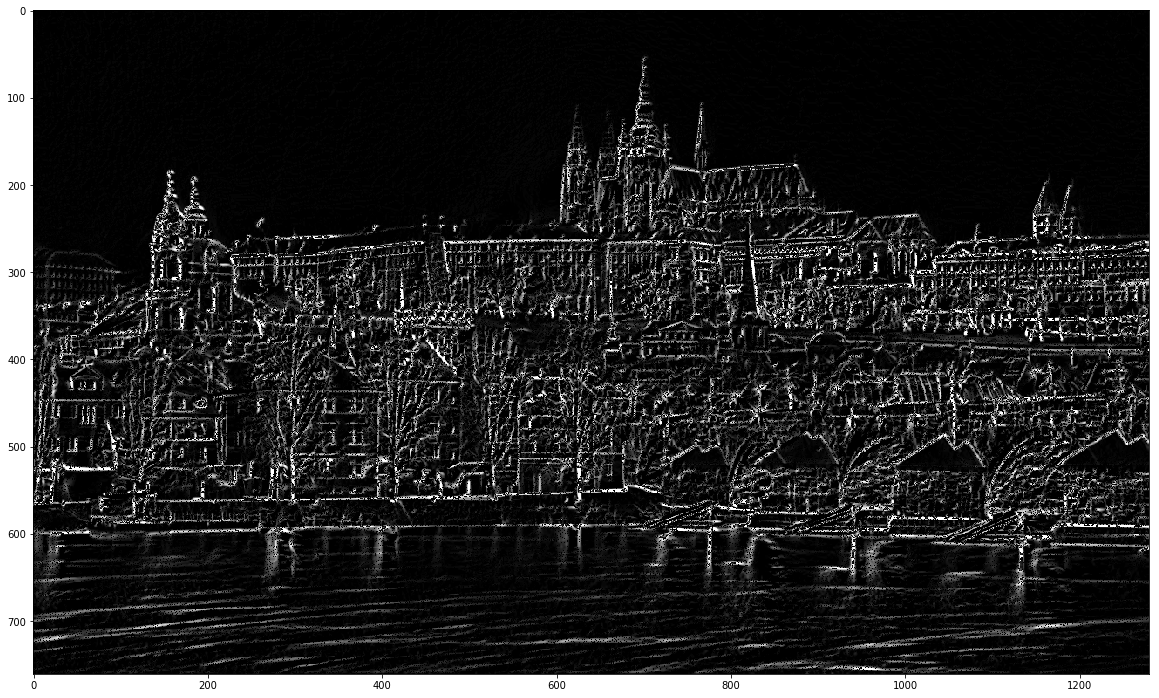

In [15]:
plt.figure(figsize=(20,20))
plt.imshow(d_img,cmap='gray')

print(np.max(magnitude))
print(np.min(magnitude))

In [16]:
t_high = 10
t_low = 5

for x in range(shape[0]):
    for y in range(shape[1]):
        if magnitude[x][y] > t_high:
            continue
        if magnitude[x][y] > t_low:
            continue
        if magnitude[x][y] <= t_low:
            d_img[x][y] = 0
            
edges = d_img
            

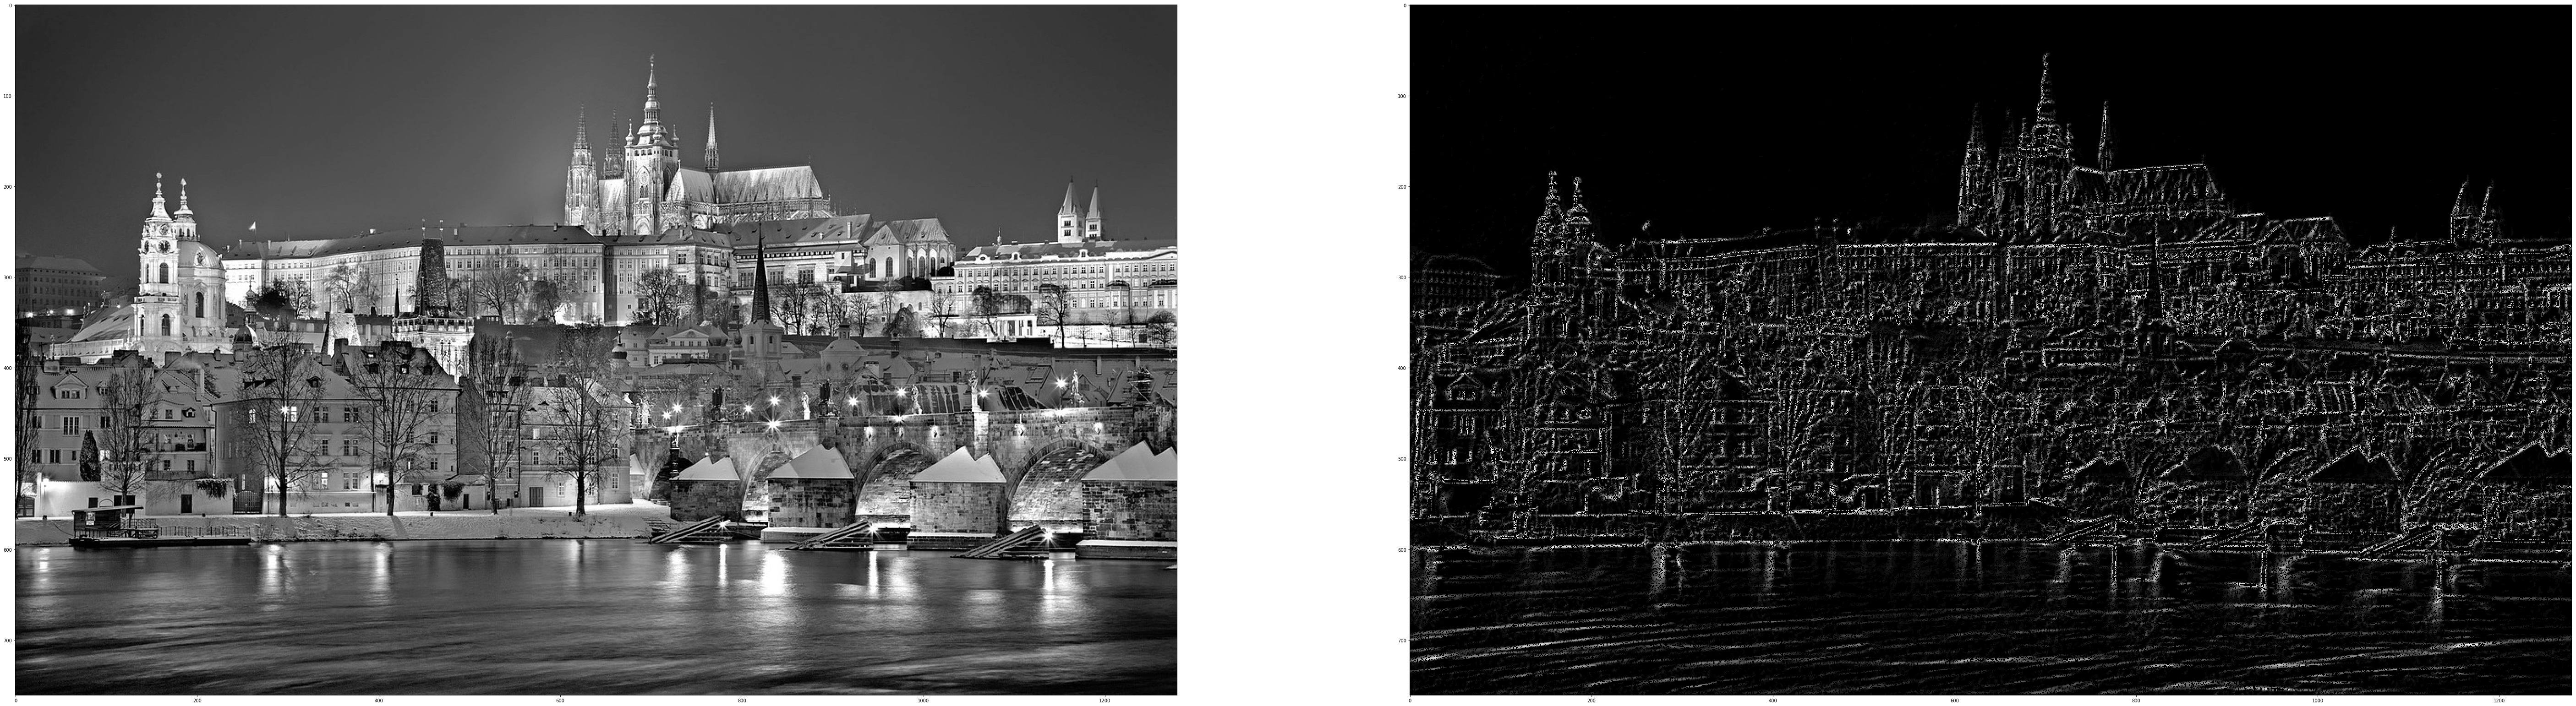

In [17]:
plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.savefig('edge_detector.png')